## Import datasets, libraries and basic EDA

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s3e17/sample_submission.csv
/kaggle/input/playground-series-s3e17/train.csv
/kaggle/input/playground-series-s3e17/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_data = pd.read_csv('/kaggle/input/playground-series-s3e17/train.csv')
train_data.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [4]:
test_data = pd.read_csv('/kaggle/input/playground-series-s3e17/test.csv')
test_data.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [5]:
df = train_data.drop(['Machine failure'], axis=1) 
df = pd.concat([df, test_data], axis=0).reset_index(drop=True)

In [6]:
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [7]:
train_max = train_data.shape[0] #This will help us divide the dataframe back into training and testing sets later.
train_max

136429

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227383 entries, 0 to 227382
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       227383 non-null  int64  
 1   Product ID               227383 non-null  object 
 2   Type                     227383 non-null  object 
 3   Air temperature [K]      227383 non-null  float64
 4   Process temperature [K]  227383 non-null  float64
 5   Rotational speed [rpm]   227383 non-null  int64  
 6   Torque [Nm]              227383 non-null  float64
 7   Tool wear [min]          227383 non-null  int64  
 8   TWF                      227383 non-null  int64  
 9   HDF                      227383 non-null  int64  
 10  PWF                      227383 non-null  int64  
 11  OSF                      227383 non-null  int64  
 12  RNF                      227383 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 22.6+ MB


In [9]:
train_data.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
train_data.corr()['Machine failure'].sort_values(ascending=False)

Machine failure            1.000000
HDF                        0.564507
OSF                        0.494668
PWF                        0.383941
TWF                        0.311919
Torque [Nm]                0.145793
Air temperature [K]        0.067744
Tool wear [min]            0.056448
Process temperature [K]    0.030966
id                         0.001500
RNF                        0.001428
Rotational speed [rpm]    -0.060868
Name: Machine failure, dtype: float64

In [11]:
df.isna().sum().any()

False

In [12]:
df['Product ID'].value_counts()

L53257    224
L53271    214
L48892    211
L49056    204
L56257    203
         ... 
M18739      1
L49045      1
L52439      1
M23219      1
L49780      1
Name: Product ID, Length: 9995, dtype: int64

<Axes: xlabel='Type', ylabel='count'>

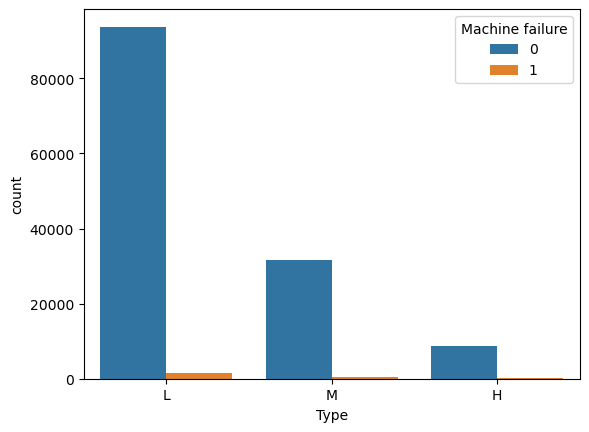

In [13]:
X = df[:train_max].copy()
y = train_data['Machine failure']
full_df = pd.concat([X, y], axis=1).copy()

sns.countplot(x='Type', hue='Machine failure', data=full_df)

<Axes: xlabel='Type', ylabel='Machine failure'>

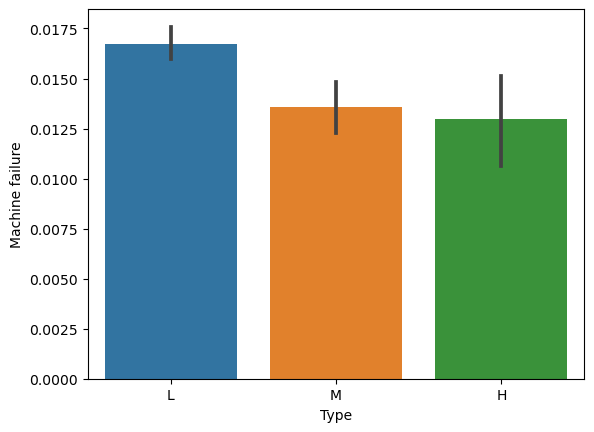

In [14]:
sns.barplot(x='Type', y='Machine failure', data=full_df)

In [15]:
df['Product ID Number'] = df['Product ID'].str.extract('(\d+)',expand=False)

In [16]:
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Product ID Number
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,50096
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,20343
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,49454
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,53355
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,24050


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'Air temperature [K]'}>,
        <Axes: title={'center': 'Process temperature [K]'}>],
       [<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>,
        <Axes: title={'center': 'Tool wear [min]'}>],
       [<Axes: title={'center': 'TWF'}>, <Axes: title={'center': 'HDF'}>,
        <Axes: title={'center': 'PWF'}>],
       [<Axes: title={'center': 'OSF'}>, <Axes: title={'center': 'RNF'}>,
        <Axes: >]], dtype=object)

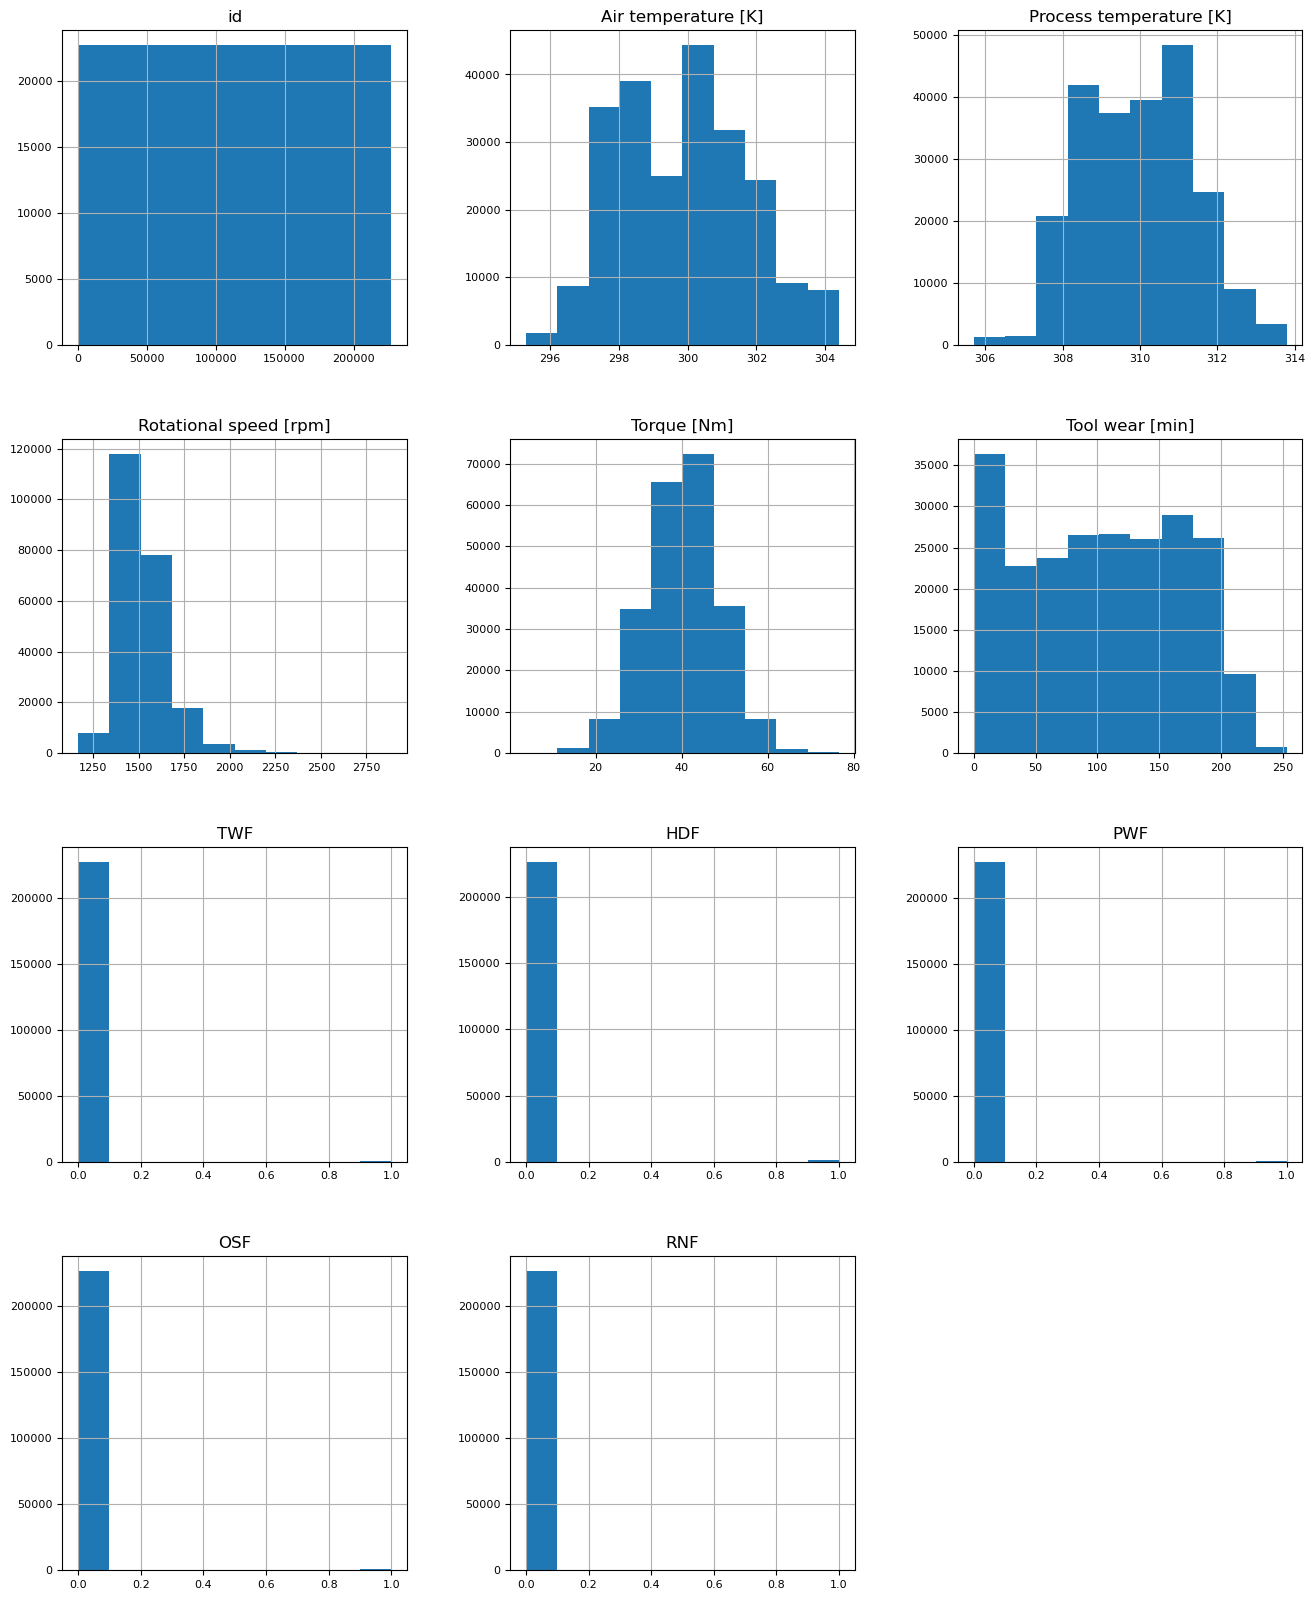

In [17]:
df[df.select_dtypes(exclude = ["object"]).columns.tolist()].hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8)

## Feature Engineering

In [18]:
df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']] = df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].astype(object)

In [19]:
df[['Air temperature [K]', 'Process temperature [K]']]
df['Residual Temperature'] = df['Process temperature [K]'] / df['Air temperature [K]']

In [20]:
df['Power'] = df['Rotational speed [rpm]'] * df['Torque [Nm]']

In [21]:
df['Total Failure'] = df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum(axis=1)

In [22]:
df['Wear vs speed'] = df['Tool wear [min]'] * df['Rotational speed [rpm]']

In [23]:
df["Torque Wear Ratio"] = df['Torque [Nm]'] / (df['Tool wear [min]'] + 0.0001)

In [24]:
df["Torque vs Wear"] = df['Torque [Nm]'] * df['Tool wear [min]']

In [25]:
df['Product ID Number'] = df['Product ID Number'].astype(int)

<Axes: ylabel='Frequency'>

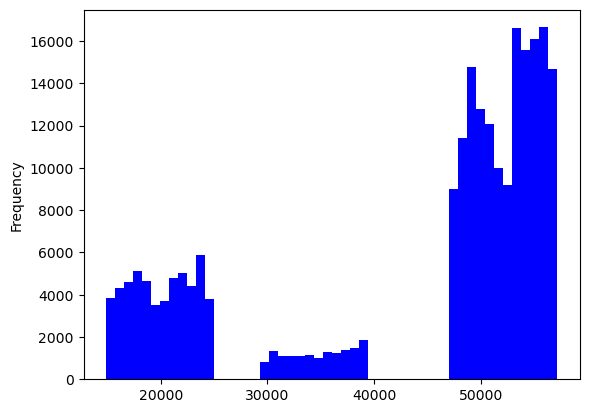

In [26]:
df['Product ID Number'].plot(kind='hist', bins=50, color='blue')

In [27]:
df['Product ID Number Group'] = df['Product ID Number']
for i, num in enumerate(df['Product ID Number']):
    if num <= 25000:
        df.loc[i, 'Product ID Number Group'] = 1
    elif num > 25000 and num <= 40000:
        df.loc[i, 'Product ID Number Group'] = 2
    else:
        df.loc[i, 'Product ID Number Group'] = 3 

In [28]:
df['Product ID Number Group'] = df['Product ID Number Group'].astype(int)

In [29]:
df.rename(columns={"Air temperature [K]": "Air temperature (K)", 'Process temperature [K]': 'Process temperature(K)', 'Rotational speed [rpm]': 'Rotational speed (rpm)', 'Torque [Nm]' : 'Torque (Nm)', 'Tool wear [min]': 'Tool wear (min)'}, inplace=True)

In [30]:
df['Total Failure'] = df['Total Failure'].astype(object)

In [31]:
grouped_fts = df.drop(["id"],axis=1).groupby("Product ID",as_index=False).transform('median')
grouped_fts.columns = grouped_fts.columns + "_median"

grouped_fts2 = df.drop(["id"],axis=1).groupby("Product ID",as_index=False).transform('mean')
grouped_fts2.columns = grouped_fts2.columns + "_mean"


df = df.merge(grouped_fts,left_index=True,right_index=True,how="left")
df = df.merge(grouped_fts2,left_index=True,right_index=True,how="left")

In [32]:
df.isna().any()

id                                False
Product ID                        False
Type                              False
Air temperature (K)               False
Process temperature(K)            False
Rotational speed (rpm)            False
Torque (Nm)                       False
Tool wear (min)                   False
TWF                               False
HDF                               False
PWF                               False
OSF                               False
RNF                               False
Product ID Number                 False
Residual Temperature              False
Power                             False
Total Failure                     False
Wear vs speed                     False
Torque Wear Ratio                 False
Torque vs Wear                    False
Product ID Number Group           False
Air temperature (K)_median        False
Process temperature(K)_median     False
Rotational speed (rpm)_median     False
Torque (Nm)_median                False


In [33]:
X = df[:train_max].copy()
y = train_data['Machine failure']
full_df = pd.concat([X, y], axis=1).copy()

full_df.corr()['Machine failure'].sort_values(ascending=False)

Machine failure                   1.000000
Torque (Nm)                       0.145793
Power                             0.128222
Torque vs Wear                    0.111041
Air temperature (K)               0.067744
Air temperature (K)_mean          0.067712
Air temperature (K)_median        0.067574
Tool wear (min)                   0.056448
Torque (Nm)_mean                  0.052763
Torque vs Wear_mean               0.051225
Power_mean                        0.048944
Wear vs speed                     0.043777
Torque vs Wear_median             0.041057
Tool wear (min)_mean              0.040320
Wear vs speed_mean                0.038516
Tool wear (min)_median            0.037551
Wear vs speed_median              0.034133
Torque (Nm)_median                0.031751
Process temperature(K)_mean       0.031275
Process temperature(K)            0.030966
Process temperature(K)_median     0.030703
Power_median                      0.030439
Product ID Number Group           0.011305
Product ID 

In [34]:
from scipy.stats import skew
from sklearn.preprocessing import QuantileTransformer
num_feat = df.select_dtypes(exclude = ["object"]).columns
cat_feat = df.select_dtypes(include = ["object"]).columns
train_cat = df[cat_feat]
train_num = df[num_feat]
train_num = train_num.drop(['id', 'Product ID Number'], axis=1)

# skewness = train_num.apply(lambda x: skew(x))
# skewness = skewness[abs(skewness) > 0.5] #Skewness more than 0.5 (or -0.5) is the thereshold for transformation.
# skewed_features = skewness.index
# train_num[skewed_features] = np.log1p(train_num[skewed_features])

QuantileTransformer(output_distribution='normal').fit_transform(train_num)

array([[ 0.31237604, -0.20978711,  0.75800423, ..., -1.77258753,
         0.58245246,  5.19933758],
       [ 1.44610359,  1.57996835,  1.67418578, ...,  0.48934723,
         1.06248487, -5.19933758],
       [-0.20209835, -0.91467864,  1.84844778, ...,  1.34020047,
        -0.65493048,  5.19933758],
       ...,
       [-2.96743036, -2.87784612,  0.06905612, ..., -2.20552526,
         2.51099263,  5.19933758],
       [-0.83200627, -1.67930256,  0.31369361, ...,  1.14978927,
        -0.56993365,  5.19933758],
       [ 1.81145745,  2.09652058,  0.31369361, ..., -0.54038134,
        -0.33258468,  5.19933758]])

In [35]:
train_num['Product ID Number'] = df['Product ID Number']

In [36]:
train_num.columns

Index(['Air temperature (K)', 'Process temperature(K)',
       'Rotational speed (rpm)', 'Torque (Nm)', 'Tool wear (min)',
       'Residual Temperature', 'Power', 'Wear vs speed', 'Torque Wear Ratio',
       'Torque vs Wear', 'Product ID Number Group',
       'Air temperature (K)_median', 'Process temperature(K)_median',
       'Rotational speed (rpm)_median', 'Torque (Nm)_median',
       'Tool wear (min)_median', 'Product ID Number_median',
       'Residual Temperature_median', 'Power_median', 'Wear vs speed_median',
       'Torque Wear Ratio_median', 'Torque vs Wear_median',
       'Product ID Number Group_median', 'Air temperature (K)_mean',
       'Process temperature(K)_mean', 'Rotational speed (rpm)_mean',
       'Torque (Nm)_mean', 'Tool wear (min)_mean', 'Product ID Number_mean',
       'Residual Temperature_mean', 'Power_mean', 'Wear vs speed_mean',
       'Torque Wear Ratio_mean', 'Torque vs Wear_mean',
       'Product ID Number Group_mean', 'Product ID Number'],
      dtype=

In [37]:
train_cat.columns

Index(['Product ID', 'Type', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF',
       'Total Failure'],
      dtype='object')

In [38]:
train_cat = train_cat.drop(['Product ID'], axis=1)

## Modeling

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix
import optuna
from sklearn.ensemble import VotingClassifier, StackingClassifier

In [40]:
train_cat = pd.get_dummies(train_cat) #Create dummies for the categorical features
X = pd.concat([train_cat, train_num], axis=1) #Concatenate both categorical and numerical features back together.
X_test = X[train_max:].copy()
X = X[:train_max].copy() #create train and test datasets for modeling
y = train_data['Machine failure']

In [41]:
scl = StandardScaler()
scl.fit(X)
scl.transform(X)
scl.transform(X_test)

array([[-0.26453926,  0.65632558, -0.55527706, ..., -1.21116318,
         0.63256078,  0.51043954],
       [-0.26453926,  0.65632558, -0.55527706, ..., -1.41554715,
         0.63256078,  0.7207878 ],
       [-0.26453926,  0.65632558, -0.55527706, ...,  0.20055602,
         0.63256078,  0.48225146],
       ...,
       [-0.26453926,  0.65632558, -0.55527706, ...,  2.26003275,
         0.63256078,  0.31220225],
       [-0.26453926,  0.65632558, -0.55527706, ..., -0.68306515,
         0.63256078,  0.37396106],
       [-0.26453926,  0.65632558, -0.55527706, ..., -0.40694533,
         0.63256078,  0.62581238]])

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.85, random_state=42)

In [43]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    score = roc_auc_score(y_test, clf.predict_proba(x_test)[:,1])
    if score>0.92:
            print(f'{confusion_matrix(y_pred, y_test)}')
            print(f'Ruc_score is {score}')
            print('*'*90)
    else:
        print(f'{confusion_matrix(y_pred, y_test)}')
        print(f"Not a good model with score = {score}")
        print('x'*90)
    return clf

In [44]:
models = {
    'cat': CatBoostClassifier(verbose = False),
    'lgbm': LGBMClassifier(is_unbalance = True),
    'xgb': XGBClassifier(objective="binary:logistic"),
#     'DT' : DecisionTreeClassifier(),
#     'RFC': RandomForestClassifier(),
#     'LR' : LogisticRegression(),
    'brf' : BalancedRandomForestClassifier(random_state=0),
#     'mlp' : MLPClassifier(),
#     'KNN' : KNeighborsClassifier(n_neighbors= 8),
    'hgb':HistGradientBoostingClassifier(),
#     'gbc': GradientBoostingClassifier(),
#     'bc' : BaggingClassifier()
}

In [45]:
%%time
for i in range(len(models)):
    model = list(models.values())[i]
    print(f'for {list(models.keys())[i]}')
    train_classifier(model, X_train, y_train, X_val, y_val)

for cat
[[20135    72]
 [    5   253]]
Ruc_score is 0.9670447635780308
******************************************************************************************
for lgbm
[[19909    50]
 [  231   275]]
Ruc_score is 0.9580642426094264
******************************************************************************************
for xgb
[[20131    74]
 [    9   251]]
Ruc_score is 0.964281109158964
******************************************************************************************
for brf
[[19237    32]
 [  903   293]]
Ruc_score is 0.9753398518065847
******************************************************************************************
for hgb
[[20134    73]
 [    6   252]]
Ruc_score is 0.968449621877626
******************************************************************************************
CPU times: user 3min, sys: 1.87 s, total: 3min 1s
Wall time: 1min 38s


In [46]:
# %%time
# def catboost_objective(trial):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
#         'max_depth': trial.suggest_int('max_depth', 3, 12),
#         'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
#         'colsample_bylevel': trial.suggest_uniform('colsample_bylevel', 0.5, 1.0),
#     }

#     classifier = CatBoostClassifier(**params,verbose = False)
#     classifier.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=20, verbose=False)

#     y_pred_proba = classifier.predict_proba(X_val)[:, 1]
#     roc_auc = roc_auc_score(y_val, y_pred_proba)

#     return roc_auc

# # Create the Optuna study and optimize the objective functions
# catboost_study = optuna.create_study(direction='maximize')
# catboost_study.optimize(catboost_objective, n_trials=10)

# # Print the best hyperparameters and corresponding ROC AUC scores - CatBoostClassifier
# catboost_best_params = catboost_study.best_params
# catboost_best_score = catboost_study.best_value
# print("CatBoost Best Hyperparameters: ", catboost_best_params)
# print("CatBoost Best ROC AUC Score: ", catboost_best_score)

In [47]:
# %%time
# def xgb_objective(trial):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 400),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
#     }

#     classifier = XGBClassifier(**params, random_state=42, objective = "binary:logistic")
#     classifier.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=20, verbose=False)

#     y_pred_proba = classifier.predict_proba(X_val)[:, 1]
#     roc_auc = roc_auc_score(y_val, y_pred_proba)

#     return roc_auc

# xgb_study = optuna.create_study(direction='maximize')
# xgb_study.optimize(xgb_objective, n_trials=10)

# # Print the best hyperparameters and corresponding ROC AUC scores - XGBClassifier
# xgb_best_params = xgb_study.best_params
# xgb_best_score = xgb_study.best_value
# print("XGB Best Hyperparameters: ", xgb_best_params)
# print("XGB Best ROC AUC Score: ", xgb_best_score)

In [48]:
# %%time
# def lgbm_objective(trial):

#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 900),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'num_leaves': trial.suggest_int('num_leaves', 10, 1000),
#         'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
#     }

#     classifier = LGBMClassifier(**params, is_unbalance = True)
#     classifier.fit(X_train, y_train)
#     y_pred_proba = classifier.predict_proba(X_val)[:, 1]

#     # Calculate ROC AUC score for validation predictions
#     roc_auc = roc_auc_score(y_val, y_pred_proba)

#     return roc_auc

# study = optuna.create_study(direction='maximize')
# study.optimize(lgbm_objective, n_trials=10)

# # Print the best hyperparameters and corresponding ROC AUC score
# lgbm_best_params = study.best_params
# lgbm_best_score= study.best_value
# print("Best Hyperparameters: ",lgbm_best_params)
# print("Best ROC AUC Score: ", lgbm_best_score)

In [49]:
# %%time
# def brc_objective(trial):
#     # Define the hyperparameters to optimize
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 500),
#         'max_depth': trial.suggest_categorical('max_depth', [3, 5, 10, None]),
#         'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
#         'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
#         'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2', None])
#     }

#     classifier = BalancedRandomForestClassifier(**params)
#     classifier.fit(X_train, y_train)

#     # Predict probabilities for the validation data
#     y_pred_proba = classifier.predict_proba(X_val)[:, 1]

#     # Calculate ROC AUC score for validation predictions
#     roc_auc = roc_auc_score(y_val, y_pred_proba)

#     return roc_auc

# study = optuna.create_study(direction='maximize')
# study.optimize(brc_objective, n_trials=10)

# # Print the best hyperparameters and corresponding ROC AUC score
# brc_best_params = study.best_params
# brc_best_score = study.best_value
# print("Best Hyperparameters: ", brc_best_params)
# print("Best ROC AUC Score: ", brc_best_score)

In [50]:
# def objective(trial):
#     params = {
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
#         'max_iter': trial.suggest_int('max_iter', 100, 900),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'l2_regularization': trial.suggest_float('l2_regularization', 0.0, 1.0)
#     }

#     clf = HistGradientBoostingClassifier(**params)
#     clf.fit(X_train, y_train)
    
#     y_pred_proba = clf.predict_proba(X_val)[:, 1]
#     roc_auc = roc_auc_score(y_val, y_pred_proba)
    
#     return roc_auc

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# hgbc_best_params = study.best_params
# hgbc_best_score = study.best_value

# print("Best Hyperparameters:", hgbc_best_params)
# print("Best ROC AUC Score:", hgbc_best_score)

In [51]:
catboost_best_params = {'n_estimators': 649, 'learning_rate': 0.0062705428242741945, 'max_depth': 12, 'subsample': 0.8855188932055043, 'colsample_bylevel': 0.6899475101813313}
xgboost_best_params = {'n_estimators': 133, 'learning_rate': 0.0013104173640992225, 'max_depth': 4, 'subsample': 0.6481905731719003, 'colsample_bytree': 0.7628669562034882}
lgbm_best_params = {'n_estimators': 345, 'learning_rate': 0.0010228047955045541, 'max_depth': 8, 'num_leaves': 643, 'subsample': 0.6367282101284274, 'colsample_bytree': 0.5217235179303401}
brc_best_params = {'n_estimators': 373, 'max_depth': None, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2'}
hist_best_params = {'learning_rate': 0.061624143918730535, 'max_iter': 637, 'max_depth': 10, 'l2_regularization': 0.8593823100125006}

In [52]:
cat = CatBoostClassifier(**catboost_best_params, verbose = False, objective = 'Logloss')
xgb = XGBClassifier(**xgboost_best_params, objective = "binary:logistic")
lgbm = LGBMClassifier(**lgbm_best_params, is_unbalance = True, objective = 'binary')
brc = BalancedRandomForestClassifier(**brc_best_params)
hist = HistGradientBoostingClassifier(**hist_best_params)

In [53]:
%%time
voting = VotingClassifier([('cat',cat),('xgb',xgb),('lgbm',lgbm),('brc',brc), ('hist',hist)], voting = 'soft')
train_classifier(voting, X_train, y_train, X_val, y_val)

[[20138    75]
 [    2   250]]
Ruc_score is 0.976543732335192
******************************************************************************************
CPU times: user 8min 55s, sys: 4.76 s, total: 9min
Wall time: 4min 58s


VotingClassifier(estimators=[('cat',
                              <catboost.core.CatBoostClassifier object at 0x7bbdce82c550>),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.7628669562034882,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None...
                                             max_depth=8, n_estimators=345,
                                             num_leaves=643, objective='binary',
                                             subsample=0.6367282101284274)),
                             ('brc',
                              BalancedRandomForestClassifier(max_features='log2',
                                                             min_samples_leaf=2,
                                                             min_samples_split=5,
                                                             n_estimators=373)),
                             ('hist',
                              HistGradientBoostingClassifier(l2_regularization=0.8593823100125006,
                                                             learning_rate=0.061624143918730535,
                                                             max_depth=10,
                                                             max_iter=637))],
                 voting='soft')

In [54]:
preds = voting.predict_proba(X_test)
predictions = [pred[1] for pred in preds]

In [55]:
output = pd.DataFrame({'id': test_data['id'], 'Machine failure': predictions})

In [56]:
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
